<a href="https://colab.research.google.com/github/JoshEthan/Prove06/blob/master/05Prove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

* Choose at least **3** different datasets to use the *Decision Tree Algorithm* on.

* **Handle**:
  * Numeric data
  * Categorical data
  * Missing data
  * Classification
  * Regression
* Week 1: Complete all of the work for at least *one* dataset. 
* Week 2: Complete all of the work for all *three* datasets.

* For **categorical data**, try different approaches and compare/contrast their effectiveness.

* For **missing data**, try different approaches and contrast the results.

* Try different strategies to **reduce the height** of the tree and note their effectiveness.

* Prepare a PDF report that includes: 
  * The **results** of running the algorithm on the datasets you chose.
  * **Discussion** of each of the above points (*numeric data, missing data, etc.*) 
  * The **conclusion** of the parameter values, encoding strategies (for categorical data), and performance metrics you chose.

* Stretch: Implementing your own version of ID3.

#Report

**Results**: The results show us that there is roughly about 90% accuracy. This is true about all of the Decision Trees. 

**Discussion**: For the preprocessing, I tried different styles of them. For one of the data sets it didn't have any missing data, so it didn't need to be handled. For one of them, I handled the missing data with both Impute and Dropping. Th two of them are relatively the same. For the data that was binary I used label encoding. The rest of the categorical data I used one hot encoding. The different methods seem to work equally well. Although I do prefer to drop the data since it is much simpler.

As for the stretch I began to impliment my own ID3, but I also did visualization.

# Data Set #1 - Numeric, Categorical, Missing, Classification, Regression

In [21]:
# IMPORT DATA
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
names = ["party", "handicapped", "cost_sharing", 
                "budget_resolution", "fee_freeze", "salvador_aid",
                "religious_schools", "test_ban", "nicaraguan_aid",
                "mx_missile", "immigration" , "synfuels_cutback",
                "education_spending", "right_to_sue", "crime",
                "duty_exports", "south_africa_act",]
data = pd.read_csv(url, names=names)


# NON-NUMERIC DATA
from numpy import array
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data.party = label_encoder.fit_transform(array(data.party))
data.handicapped = label_encoder.fit_transform(array(data.handicapped))
data.cost_sharing = label_encoder.fit_transform(array(data.cost_sharing))
data.budget_resolution = label_encoder.fit_transform(array(data.budget_resolution))
data.fee_freeze = label_encoder.fit_transform(array(data.fee_freeze))
data.salvador_aid = label_encoder.fit_transform(array(data.salvador_aid))
data.religious_schools = label_encoder.fit_transform(array(data.religious_schools))
data.test_ban = label_encoder.fit_transform(array(data.test_ban))
data.nicaraguan_aid = label_encoder.fit_transform(array(data.nicaraguan_aid))
data.mx_missile = label_encoder.fit_transform(array(data.mx_missile))
data.immigration = label_encoder.fit_transform(array(data.immigration))
data.synfuels_cutback = label_encoder.fit_transform(array(data.synfuels_cutback))
data.education_spending = label_encoder.fit_transform(array(data.education_spending))
data.right_to_sue = label_encoder.fit_transform(array(data.right_to_sue))
data.crime = label_encoder.fit_transform(array(data.crime))
data.duty_exports = label_encoder.fit_transform(array(data.duty_exports))
data.south_africa_act = label_encoder.fit_transform(array(data.south_africa_act))


# MISSING DATA
from numpy import nan
data_drop = data                                                                              # Drop Data
data_drop[["handicapped", "cost_sharing", "budget_resolution", "fee_freeze", "salvador_aid", 
           "religious_schools", "test_ban", "nicaraguan_aid", "mx_missile", "immigration" , 
           "synfuels_cutback", "education_spending", "right_to_sue", "crime", "duty_exports", 
           "south_africa_act"]] = data_drop.drop(columns=["party"]).replace(0, nan)   
data_drop.dropna(inplace=True)

data_impute = data                                                                              # Impute Data
data_impute[["handicapped", "cost_sharing", "budget_resolution", "fee_freeze", "salvador_aid", 
           "religious_schools", "test_ban", "nicaraguan_aid", "mx_missile", "immigration" , 
           "synfuels_cutback", "education_spending", "right_to_sue", "crime", "duty_exports", 
           "south_africa_act"]] = data_impute.drop(columns=["party"]).replace(0, nan)
data_impute.fillna(round(data_impute.mean()), inplace=True)


# CLASSIFICATION
k = 9
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = data_drop.drop(columns=["party"]).to_numpy()                                              # Drop Data
y = data_drop.party.to_numpy()
average = 0
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train, y_train)
  predictions = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  average += accuracy
print("Dropped missing data Accuracy: {}".format(average/100))

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = data_impute.drop(columns=["party"]).to_numpy()                                            # Impute Data
y = data_impute.party.to_numpy()
average = 0
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train, y_train)
  predictions = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  average += accuracy
print("Imputed missing data Accuracy: {}".format(average/100))


# REGRESSION
from sklearn.neighbors import KNeighborsRegressor
regr = KNeighborsRegressor(n_neighbors=k)
X = data_drop.drop(columns=["party"]).to_numpy()                                            # Impute Data
y = data_drop.party.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
score = regr.score(X_test, y_test)
print("Dropped missing data Regression Score: {}".format(score))

regr = KNeighborsRegressor(n_neighbors=k)
X = data_impute.drop(columns=["party"]).to_numpy()                                            # Impute Data
y = data_impute.party.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
score = regr.score(X_test, y_test)
print("Imputed missing data Regression Score: {}".format(score))



Dropped missing data Accuracy: 0.9225531914893625
Imputed missing data Accuracy: 0.9191489361702136
Dropped missing data Regression Score: 0.7320314253647586
Imputed missing data Regression Score: 0.7910221843810606


# Dataset #1 - Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#split dataset in features and target variable
X = data_impute.drop(columns=["party"]) # Features
y = data_impute.party

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Non-Optimizd Accuracy:",metrics.accuracy_score(y_test, y_pred))


# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Optimized Accuracy:",metrics.accuracy_score(y_test, y_pred))

Non-Optimizd Accuracy: 0.9571428571428572
Optimized Accuracy: 0.9285714285714286


# Dataset #1 - Visualization

In [0]:
# IMPORTANT THINGS TO INSTALL FOR VISUALIZATION
#pip install pydotplus
#pip install graphviz

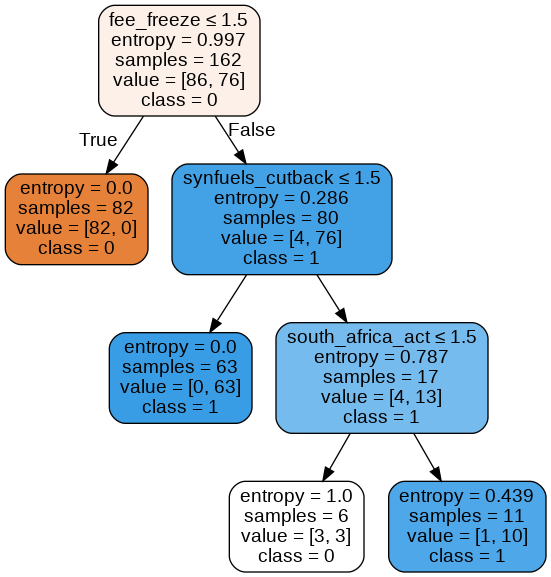

In [24]:
# VISUALIZATION
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as py

feature_cols = ["handicapped", "cost_sharing", "budget_resolution", "fee_freeze", "salvador_aid", 
           "religious_schools", "test_ban", "nicaraguan_aid", "mx_missile", "immigration" , 
           "synfuels_cutback", "education_spending", "right_to_sue", "crime", "duty_exports", 
           "south_africa_act"]

# Take data from Decision Tree and combine it with other feature for graph
dot_data = export_graphviz(clf, filled=True, rounded=True, special_characters=True, feature_names=feature_cols, class_names=['0', '1'])

# Put info about image into an object
graph = py.graph_from_dot_data(dot_data)

# Display actual Image
Image(graph.create_png())


# Data Set #2 - Numeric, Categorical, Missing, Classification, Regression

In [25]:
# IMPORT DATA
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
names = ["A01", "A02", "A03", 
         "A04", "A05", "A06",
         "A07", "A08", "A09",
         "A10", "A11", "A12",
         "A13", "A14", "A15",
         "A16"]
data = pd.read_csv(url, names=names)
pd.set_option('display.max_columns', 500)

# MISSING DATA
from numpy import nan
data = data.replace("?", nan)
data.dropna(inplace=True)

# NON-NUMERIC DATA
from numpy import array
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data.A01 = label_encoder.fit_transform(array(data.A01))

data.A04 = data.A04.astype('category')
data.A04 = data.A04.cat.codes

data.A05 = data.A05.astype('category')
data.A05 = data.A05.cat.codes

data.A06 = data.A06.astype('category')
data.A06 = data.A06.cat.codes

data.A07 = data.A07.astype('category')
data.A07 = data.A07.cat.codes

data.A09 = label_encoder.fit_transform(array(data.A09))

data.A10 = label_encoder.fit_transform(array(data.A10))

data.A12 = label_encoder.fit_transform(array(data.A12))

data.A13 = data.A13.astype('category')
data.A13 = data.A13.cat.codes

data.A16 = label_encoder.fit_transform(array(data.A16))

# CLASSIFICATION
k = 9
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = data.drop(columns=["A13"]).to_numpy()                                              # Drop Data
y = data.A13.to_numpy()
average = 0
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train, y_train)
  predictions = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  average += accuracy
print("Accuracy: {}".format(average/100))


# REGRESSION
from sklearn.neighbors import KNeighborsRegressor
regr = KNeighborsRegressor(n_neighbors=k)
X = data.drop(columns=["A13"]).to_numpy()                                            # Impute Data
y = data.A13.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
score = regr.score(X, y)
print("Regression Score: {}".format(score))

Accuracy: 0.9180152671755731
Regression Score: 0.1474878637805398


# Dataset #2 - Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Non-Optimizd Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Optimized Accuracy:",metrics.accuracy_score(y_test, y_pred))

Non-Optimizd Accuracy: 0.8244274809160306
Optimized Accuracy: 0.8854961832061069


# Dataset #2 - Visualization

In [0]:
# IMPORTANT THINGS TO INSTALL FOR VISUALIZATION
#pip install pydotplus
#pip install graphviz

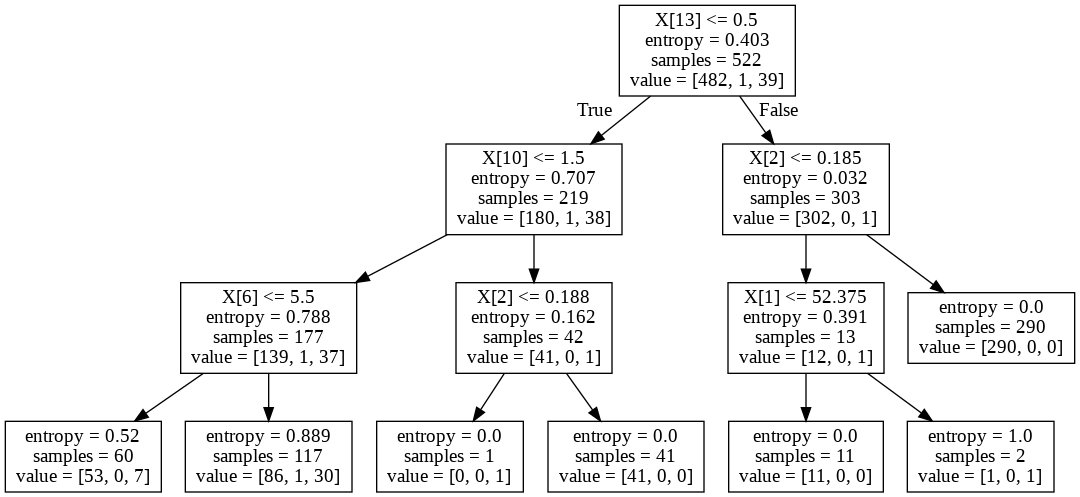

In [28]:
# VISUALIZATION
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as py

feature_cols = ["A01", "A02", "A03", 
         "A04", "A05", "A06",
         "A07", "A08", "A09",
         "A10", "A11", "A12",
         "A13", "A14", "A15"]

# Take data from Decision Tree and combine it with other feature for graph
dot_data = export_graphviz(clf)

# Put info about image into an object
graph = py.graph_from_dot_data(dot_data)

# Display actual Image
Image(graph.create_png())


# Data Set #3 - Numeric, Categorical, Missing, Classification, Regression

In [29]:
# IMPORT DATA
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data"
names = ["W_King_file", "W_King_rank", "White_Rook_file", 
         "White_Rook_rank", "Black_King_file", "Black_King_rank",
         "depth_of_win"]
data = pd.read_csv(url, names=names)
pd.set_option('display.max_columns', 500)

# NON-NUMERIC DATA
from numpy import array
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data.W_King_file = data.W_King_file.astype('category')
data.W_King_file = data.W_King_file.cat.codes

data.W_King_rank = data.W_King_rank.astype('category')
data.W_King_rank = data.W_King_rank.cat.codes

data.White_Rook_file = data.White_Rook_file.astype('category')
data.White_Rook_file = data.White_Rook_file.cat.codes

data.Black_King_file = data.Black_King_file.astype('category')
data.Black_King_file = data.Black_King_file.cat.codes

data.Black_King_rank = data.Black_King_rank.astype('category')
data.Black_King_rank = data.Black_King_rank.cat.codes

data.depth_of_win = data.depth_of_win.astype('category')
data.depth_of_win = data.depth_of_win.cat.codes

# CLASSIFICATION
k = 9
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = data.drop(columns=["depth_of_win"]).to_numpy()                                              # Drop Data
y = data.depth_of_win.to_numpy()
average = 0
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train, y_train)
  predictions = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  average += accuracy
print("Accuracy: {}".format(average/100))


# REGRESSION
from sklearn.neighbors import KNeighborsRegressor
regr = KNeighborsRegressor(n_neighbors=k)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
score = regr.score(X, y)
print("Regression Score: {}".format(score))

Accuracy: 0.7467516037063433
Regression Score: 0.6260634858051458


# Dataset #3 - Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Non-Optimizd Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Optimized Accuracy:",metrics.accuracy_score(y_test, y_pred))

Non-Optimizd Accuracy: 0.8410548823948681
Optimized Accuracy: 0.28706343549536706


# Dataset #3 - Visualization

In [0]:
# IMPORTANT THINGS TO INSTALL FOR VISUALIZATION
#pip install pydotplus
#pip install graphviz

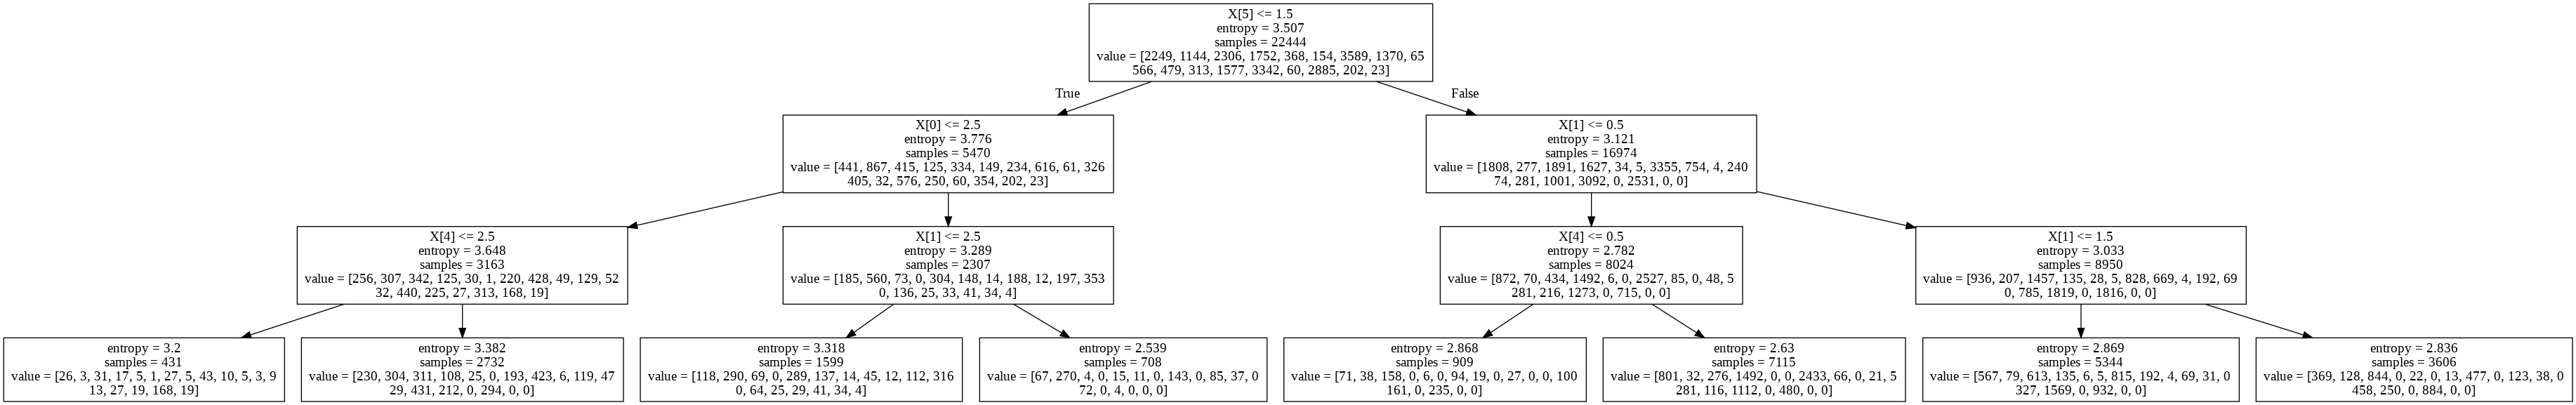

In [32]:
# VISUALIZATION
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as py


# Take data from Decision Tree and combine it with other feature for graph
dot_data = export_graphviz(clf)

# Put info about image into an object
graph = py.graph_from_dot_data(dot_data)

# Display actual Image
Image(graph.create_png())


# Stretch Implementing my own ID3 Algorithm (Unfinished)

In [0]:
def calc_entropy(p): 
  if p!=0 : 
    return - p * np .log2(p) 
  else: 
    return 0

def calc_info_gain(data,classes,feature):
  gain = 0
  nData = len(data)
  # List the values that feature can take
  values = []
  for datapoint in data:
    if datapoint[feature] not in values:
      values.append(datapoint[feature])

  featureCounts = np.zros(len(values))
  entropy = np.zeros(len(values))
  valueIndex = 0
  # Find where those values appear in data[feature] and the corresponding class
  for value in values:
    dataIndex = 0
    newClasses = []
    for datapoint in data:
      if datapoint[feature] == value:
        featureCounts[valueIndex]+=1
        newClasses.append(classes[dataIndex])
      dataIndex += 1

    # Get the values in newClasses
    classValues = []
    for aclass in newClasses:
      if classValues.count(aclass)==0:
        classValues.append(aclass)
      classCounts = np.zeros(len(classValues))
      classIndex = 0
      for classValue in classValues:
        for aclass in newClasses:
          if aclass == classValue:
            classCounts[classIndex]+=1
        classIndex += 1

      for classIndex in range(len(classValues)):
        entropy[valueIndex] += calc_entropy(float(classCounts[classIndex])/sum(classCounts))
        gain += float (featureCounts[valueIndex])/nData * entropy[valueIndex]
        valueIndex += 1
  return gain